<a href="https://colab.research.google.com/github/Rajora0/keras_studies/blob/main/Deep_Learning_previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning parte 1: Keras

## Montando drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!ls /gdrive/MyDrive/DP_KERAS/Dados/

bicicletas.csv	Passageiros.csv


## ETL 

In [ ]:
#!wget https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv -O /gdrive/MyDrive/DP_KERAS/Dados/Passageiros.csv

## Carregando os dados

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,6)
mpl.rcParams['font.size'] = 14

from sklearn.preprocessing import StandardScaler

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import GRU

In [ ]:
path = '/gdrive/MyDrive/DP_KERAS/Dados/'

In [ ]:
df = pd.read_csv(path+'Passageiros.csv', sep=',')
df

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tempo        144 non-null    float64
 1   passageiros  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


## EDA

In [ ]:
df.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


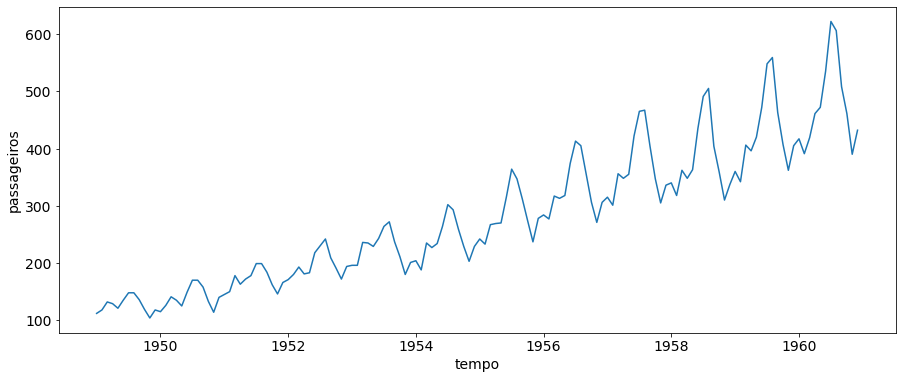

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=df)

In [ ]:
sc = StandardScaler()
sc.fit(df)

StandardScaler()

In [ ]:
dado_escalado = sc.transform(df)

x = dado_escalado[:,0]
y = dado_escalado[:,1]

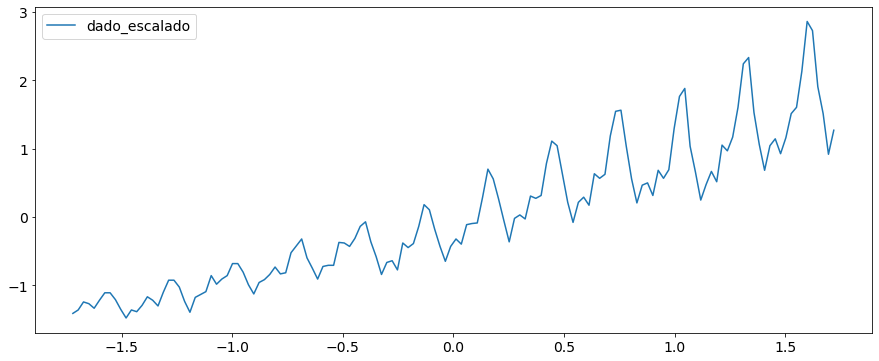

In [ ]:
sns.lineplot(x=x,y=y,label='dado_escalado')

In [ ]:
tamanho_treino = int(len(df)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(df)-tamanho_treino #O resto vamos reservar para teste
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(df)]
yteste = y[tamanho_treino:len(df)]

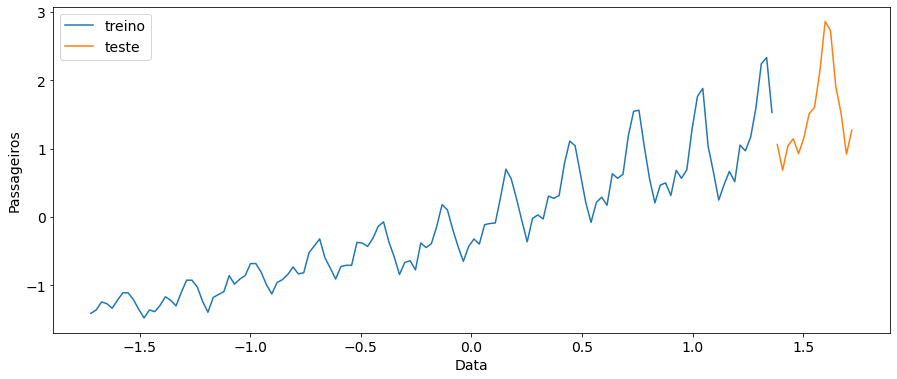

In [ ]:
plt.ylabel('Passageiros')
plt.xlabel('Data')

sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

## Regressão linear

In [ ]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones',activation='linear',use_bias=False))
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(xtreino,ytreino)
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

5/5 [==============================] - 0s 3ms/step - loss: 0.1285


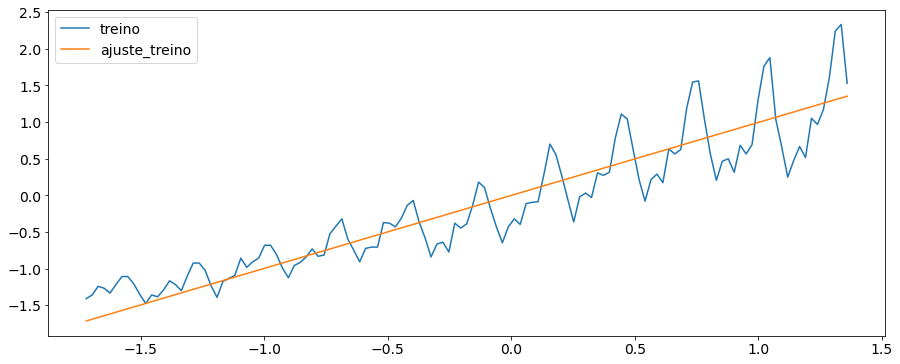

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [ ]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

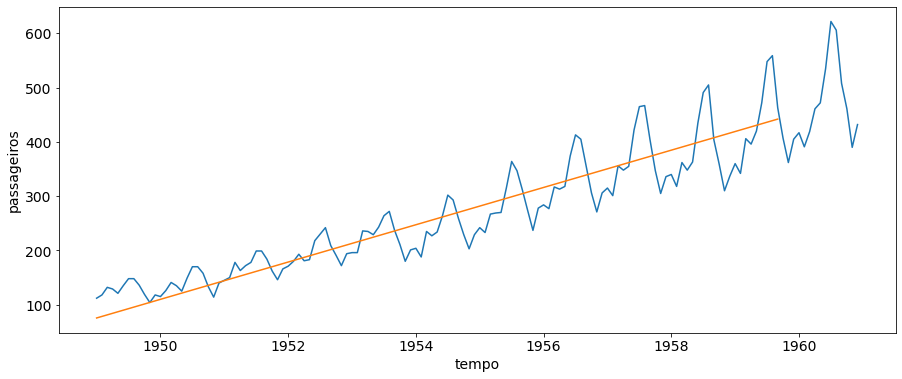

In [ ]:
sns.lineplot(x="tempo",y="passageiros",data=df)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [ ]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

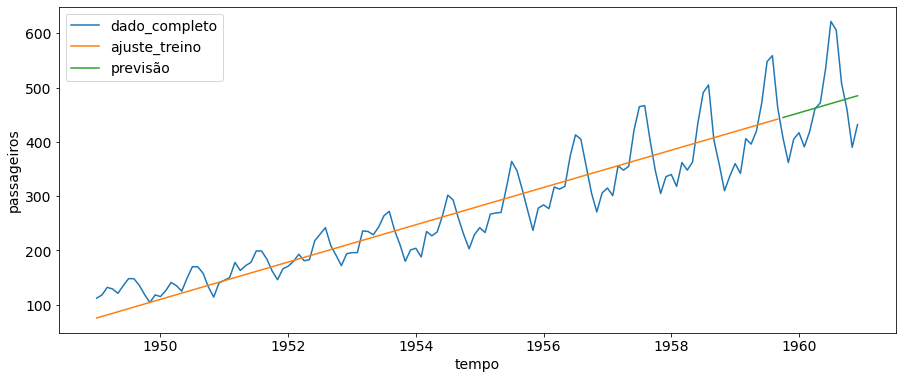

In [ ]:
sns.lineplot(x="tempo",y="passageiros",data=df,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não linear

In [ ]:
regressor2 = Sequential([
    Dense(8, input_dim=1, kernel_initializer='random_uniform',activation='sigmoid',use_bias=False),
    Dense(8, kernel_initializer='random_uniform',activation='sigmoid',use_bias=False),
    Dense(1, kernel_initializer='random_uniform',activation='linear',use_bias=False)
])

regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 8)                 8         
                                                                 
 dense_27 (Dense)            (None, 8)                 64        
                                                                 
 dense_28 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino,ytreino,epochs =1000,verbose=0)

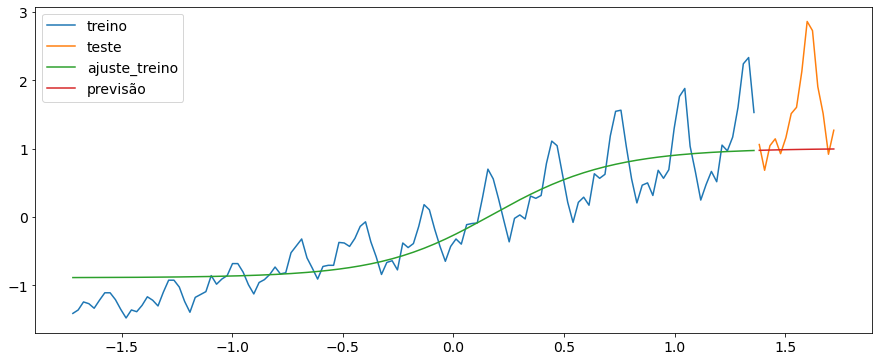

In [ ]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo = []
  y_novo = []

  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

xtreino_novo, ytreino_novo = separa_dados(vetor,1)

vetor2 = pd.DataFrame(yteste)[0]

xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [ ]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 8)                 8         
                                                                 
 dense_30 (Dense)            (None, 64)                512       
                                                                 
 dense_31 (Dense)            (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=500, verbose=0)

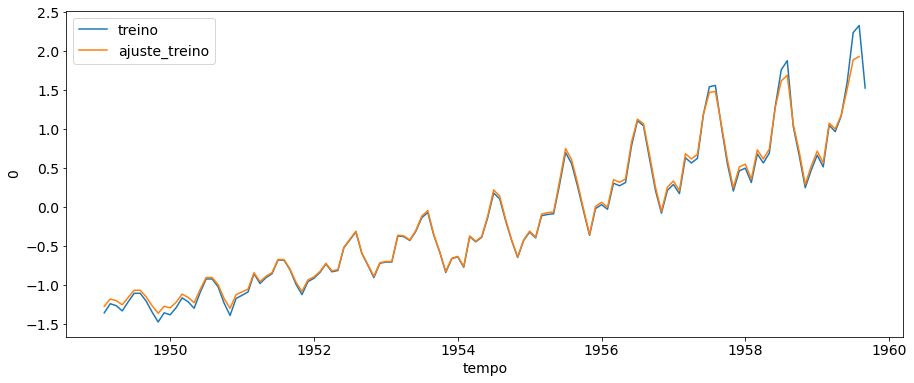

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)
sns.lineplot(x='tempo',y=ytreino_novo,data=df[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=df[1:129],label='ajuste_treino')

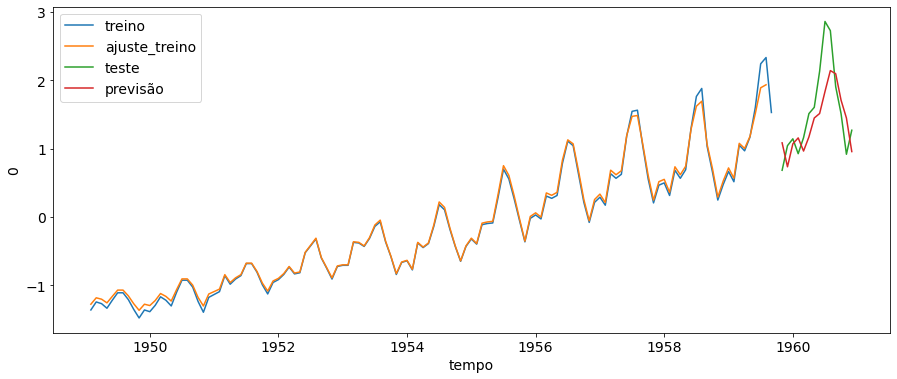

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo',y=ytreino_novo,data=df[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=df[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=df[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=df[130:144],label='previsão')

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [ ]:
regressor4 = Sequential()
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 8)                 32        
                                                                 
 dense_33 (Dense)            (None, 64)                512       
                                                                 
 dense_34 (Dense)            (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs=500, verbose=0)

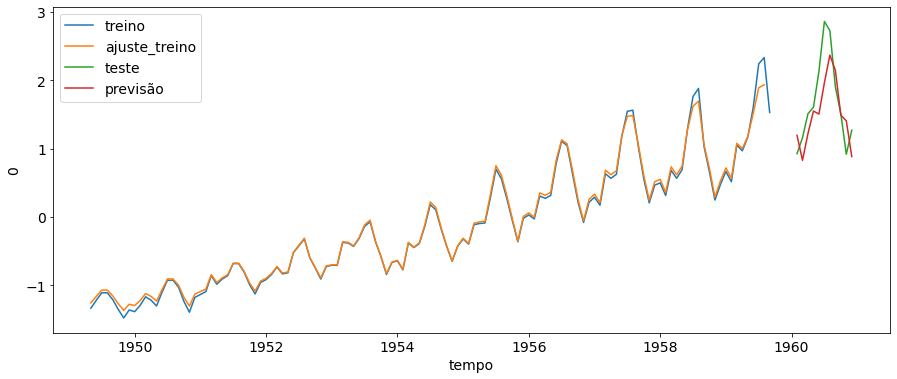

In [ ]:
y_predict_teste_novo = regressor4.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo',y=ytreino_novo,data=df[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=df[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=df[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=df[133:144],label='previsão')

## Carregando os dados

In [ ]:
bike = pd.read_csv(path+'bicicletas.csv')
bike['datas'] = pd.to_datetime(bike['datas'])
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

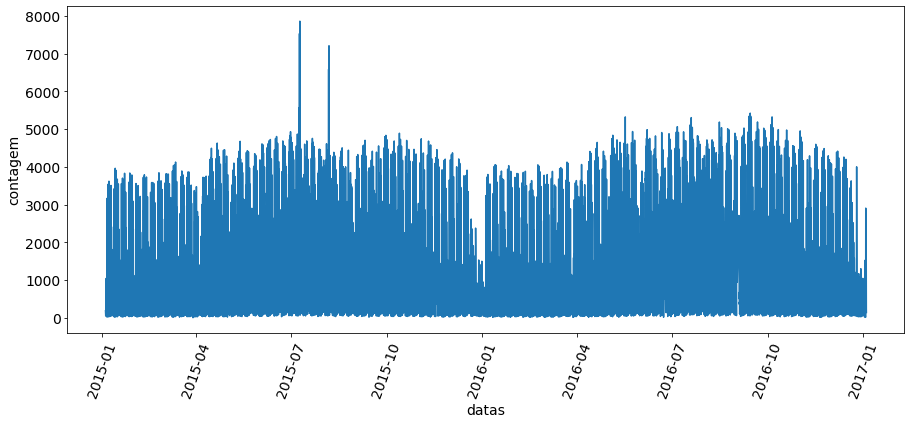

In [ ]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

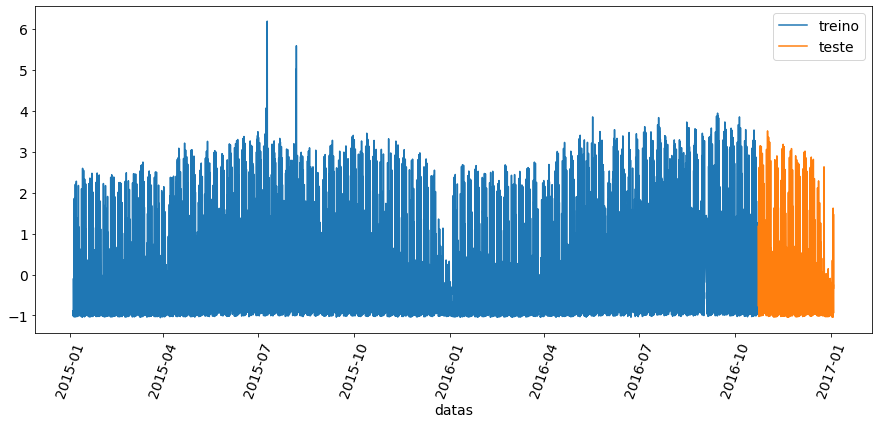

In [ ]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70) 

In [ ]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,10)
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,10)

## LSTM

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [ ]:
recorrente = Sequential()
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100, verbose=0)

CPU times: user 18min 9s, sys: 35 s, total: 18min 44s
Wall time: 11min 24s


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

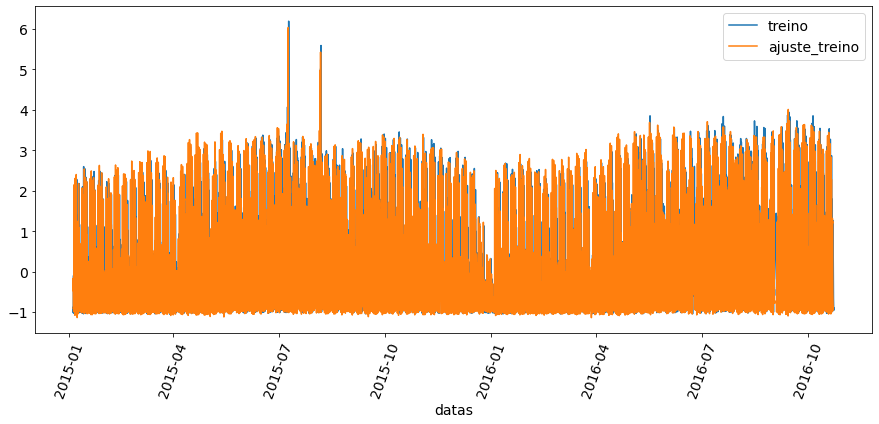

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

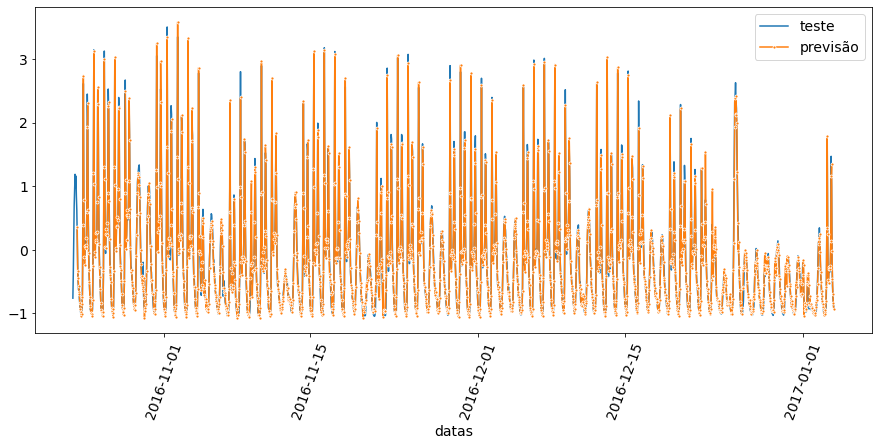

In [ ]:
y_predito = recorrente.predict(xteste_novo)
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

## GRU

In [ ]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100,verbose=0)

CPU times: user 15min 5s, sys: 29.7 s, total: 15min 34s
Wall time: 9min 23s


(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

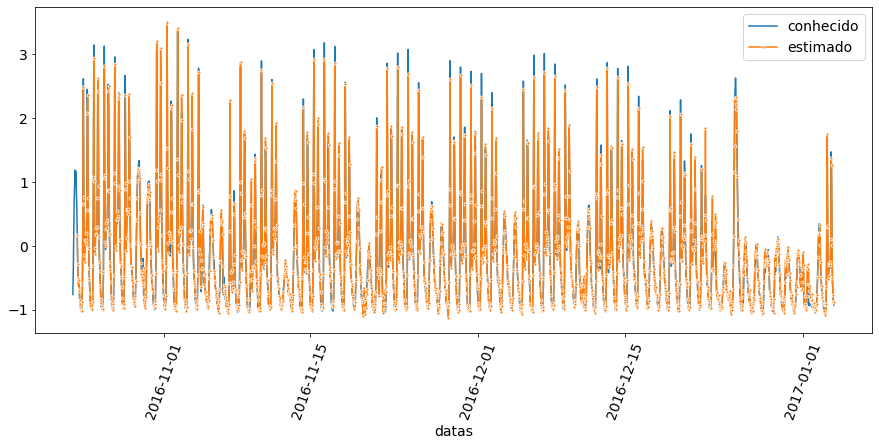

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

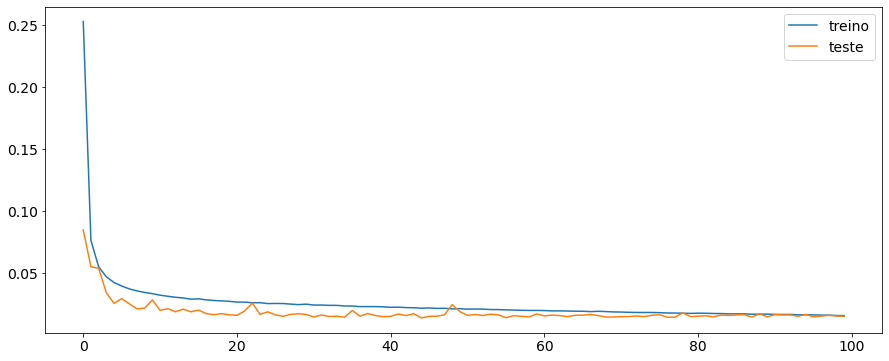

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

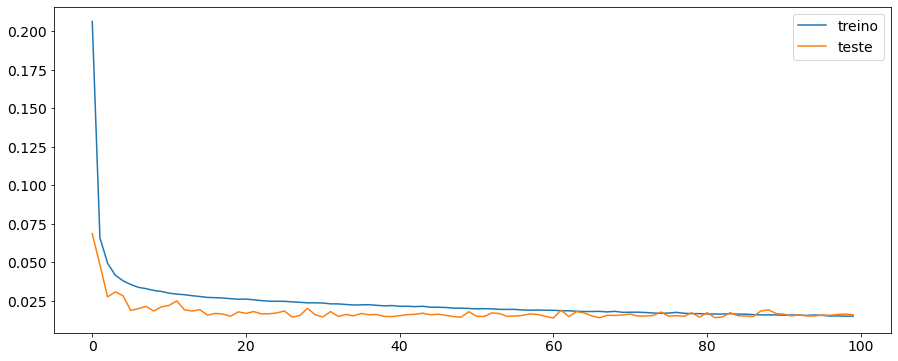

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])